In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

#Using regular expression to extract numeric value
import re

In [2]:
#read the dataset and check the first five rows
masterLoanData = pd.read_csv("loan.csv")
masterLoanData.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
masterLoanData.shape

(39717, 111)

# Data Cleaning and Missing value Analysis

In [4]:
#Identify and calculate the % of missing values in each column
missingdatacolumns = round(100*(masterLoanData.isnull().sum()/len(masterLoanData.index)), 2)
missingdatacolumns.loc[missingdatacolumns > 0].sort_values(ascending=False)


bc_open_to_buy                    100.00
acc_open_past_24mths              100.00
bc_util                           100.00
mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_rev_tl_op             100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_2

In [5]:
#get column count which has 100% data missing
missingdatacolumns.loc[missingdatacolumns == 100].shape

(54,)

### There are 54 columns which has 100% data missing
Also there are 3 more columns which has missing data more than 60%

Dropping these columns 54 + 3 = 57 columns

In [6]:
#Dropping the columns which has more than 60% data missing
masterLoanData.drop(list(missingdatacolumns[missingdatacolumns > 60].index),axis=1, inplace=True)

In [7]:
#originally 111 columns were present, after dropping 57 columns, we are left with 54 columns
masterLoanData.shape

(39717, 54)

In [8]:
#Creating list of columns which has only 1 unique value throughout the column
listDrop=[]
for x in masterLoanData.columns:
    if len(masterLoanData[x].value_counts().index) == 1:
      listDrop.append(x)
    
print(listDrop)
 

['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


### Dropping few more columns based on the following analysis

1. 'pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens':These columns has single value based on above analysis

2. 'id','member_id': These columns are acting as an indexing as it has unique values

3. 'url','desc','emp_title' : These column are descriptive in nature

In [9]:
#Dropping columns
listDrop= listDrop + ['id','member_id','url','desc','emp_title']
masterLoanData.drop(listDrop, axis=1, inplace=True)

In [10]:
#Checking the percentage of null values in the remaining columns
round((masterLoanData.isnull().sum()/len(masterLoanData.index) *100),2).sort_values(ascending=False)

emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
title                      0.03
last_credit_pull_d         0.01
total_pymnt                0.00
pub_rec                    0.00
revol_bal                  0.00
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_rec_prncp            0.00
total_pymnt_inv            0.00
inq_last_6mths             0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
last_pymnt_amnt            0.00
open_acc                   0.00
loan_amnt                  0.00
funded_amnt                0.00
delinq_2yrs                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
home_ownership             0.00
annual_i

# Cleansing Rows

### dropping rows based on the na columns which has percentage less than 0.2%<br>
last_pymnt_d               0.18%<br>
revol_util                 0.13%<br>
title                      0.03%<br>
last_credit_pull_d         0.01%<br>

In [11]:
#dropping rows based on the na columns which has percentage less than 0.2%
masterLoanData = masterLoanData[-((masterLoanData['last_pymnt_d'].isna())
               | (masterLoanData['revol_util'].isna())
               | (masterLoanData['title'].isna())
               | (masterLoanData['last_credit_pull_d'].isna()))]


#### Loan with 'Current' status won't be helpful in identifying defaulter, so focusing on 'Fully Paid' and 'Charged off' status only

#### Loan status = Current has very less data, also as it implies the loan is still in progress so nothing can be concluded on the same. So removing the rows having Loan status as 'Current'

In [12]:
#Getting value counts of loan_status
masterLoanData.loan_status.value_counts()

Fully Paid     32906
Charged Off     5541
Current         1140
Name: loan_status, dtype: int64

In [13]:
#Dropping rows which has loan_status== 'Current'
masterLoanData = masterLoanData[masterLoanData.loan_status != "Current"]
masterLoanData.loan_status.value_counts()

Fully Paid     32906
Charged Off     5541
Name: loan_status, dtype: int64

### Imputing pub_rec_bankruptcies with mode might result in incorrect analysis, so removing the null rows instead

In [14]:
print("Null value count in pub_rec_bankruptcies column: ",masterLoanData.pub_rec_bankruptcies.isnull().sum())
masterLoanData.pub_rec_bankruptcies.value_counts()

Null value count in pub_rec_bankruptcies column:  696


0.0    36116
1.0     1630
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [15]:
#Dropping rows which has null values in pub_rec_bankruptcies
masterLoanData=masterLoanData[-masterLoanData.pub_rec_bankruptcies.isnull()]

### Imputing the emp_length column may also lead to incorrect analysis, so dropping the na rows and making the column Numeric for further analysis

In [16]:
print("Null value count in emp_length column: ", masterLoanData.emp_length.isna().sum())
masterLoanData.emp_length.value_counts()

Null value count in emp_length column:  1024


10+ years    8358
< 1 year     4321
2 years      4196
3 years      3940
4 years      3281
5 years      3145
1 year       3061
6 years      2131
7 years      1684
8 years      1405
9 years      1205
Name: emp_length, dtype: int64

In [17]:
#Dropping the na rows to avoid calculation issues
masterLoanData = masterLoanData[-masterLoanData['emp_length'].isna()]

In [18]:
#Extracting numeric value and converting the column to number 
masterLoanData['emp_length'] = masterLoanData.emp_length.apply(lambda x: pd.to_numeric(re.findall('\d+',str(x))[0]))
masterLoanData.emp_length.isna().sum()

0

In [19]:
#Extracting numeric value and converting the column to number for 
masterLoanData['term'] = masterLoanData.term.apply(lambda x: pd.to_numeric(re.findall('\d+',str(x))[0]))
masterLoanData.term.value_counts()

36    27491
60     9236
Name: term, dtype: int64

### Fixing revol_util and int_rate column, as it contains '%' symbol

In [20]:
#changing the datatype of revol_util to float by removing the % sign
masterLoanData.revol_util = masterLoanData.revol_util.apply(lambda x: float(x.strip('%')))

#changing the datatype of int_rate to float by removing the % sign
masterLoanData.int_rate = masterLoanData.int_rate.apply(lambda x: float(x.strip('%')))

# Identifying Categorical and Numeric Variables for Univariate Analysis

In [21]:
#Identify the categorical and numeric variables in respective lists
columns = masterLoanData.applymap(np.isreal).all()
numeric_columns = masterLoanData.columns[columns].tolist()
categorical_columns = masterLoanData.columns[~columns].tolist()
print('Numeric Columns : ',numeric_columns)
print('\nCategorical Columns : ',categorical_columns)

Numeric Columns :  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'pub_rec_bankruptcies']

Categorical Columns :  ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']


# Univariate Analysis 

In [22]:
# Function for creating distribution and box plot
def distribution_boxplot(data, feature, plt_title, plt_label, figsize=(12,7), kde=True, bins=None):
    f2, (ax_box, ax_dist) = plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={"height_ratios":(0.25,0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data, x=feature, ax=ax_box, showmeans=True, color='mediumturquoise')
    f2.suptitle(plt_title)
    ax_box.set_xlabel(plt_label)
    if bins:
        sns.distplot(data[feature], kde=kde, ax=ax_dist, bins=bins, color='mediumpurple')
    else:
        sns.distplot(data[feature], kde=kde, ax=ax_dist, color='mediumpurple')
    
    #Creating mean and median lines for visualization on the plot    
    ax_dist.axvline(data[feature].mean(), color='green', linestyle='--')
    
    ax_dist.axvline(data[feature].median(), color='black', linestyle='-')
    
    ax_dist.set_xlabel(plt_label)

### Plotting Distribution and Box plot for Annual Income

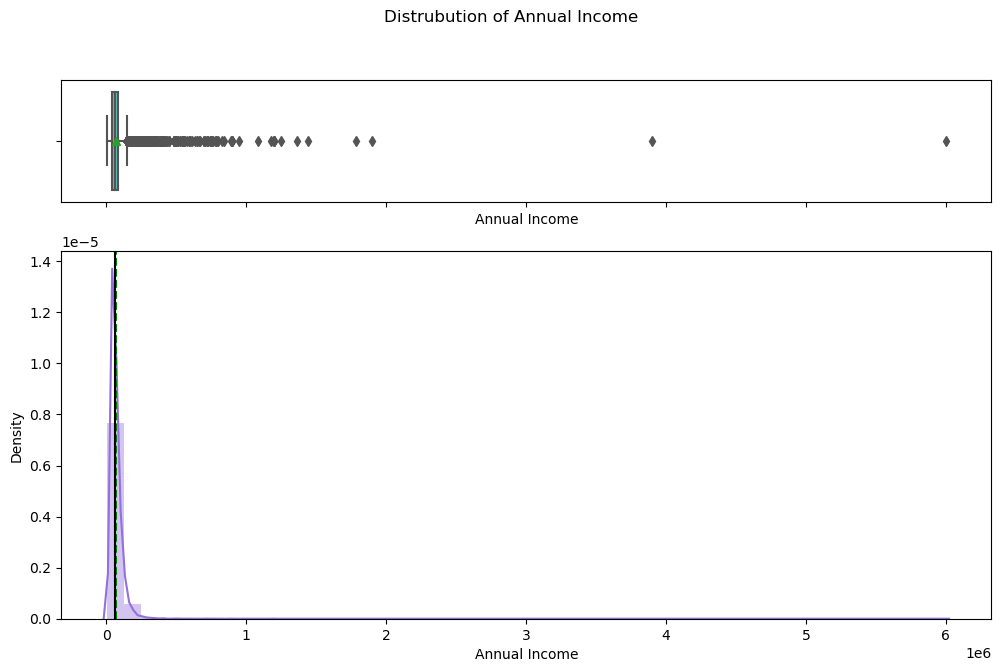

In [23]:
#Analyzing Annual Income
distribution_boxplot(masterLoanData,'annual_inc',"Distrubution of Annual Income",'Annual Income')
plt.show()

### Observation: Annual Income
<li>From the above plot we can see that there are some outliers with huge values

#### Analyzing the quantile values for those

In [24]:
#printing all the quantiles 
print(masterLoanData.annual_inc.quantile([0.25,0.5,0.75,0.80,0.90, 0.95, 0.99]))

0.25     41200.0
0.50     60000.0
0.75     83000.0
0.80     90000.0
0.90    117000.0
0.95    142000.0
0.99    235000.0
Name: annual_inc, dtype: float64


### Observation: Quantile values of Annual Income
<li>As seen in the graph there is very less data after ~150000
<li>Also above quantiles shows that value at 0.95 is 142000, so dropping data for outliers

In [25]:
#Dropping outlier rows from dataframe for Annual Income variable
masterLoanData = masterLoanData[masterLoanData.annual_inc <= masterLoanData.annual_inc.quantile(0.95)]

### Plotting Distribution and Box plot for Annual income after removing outliers

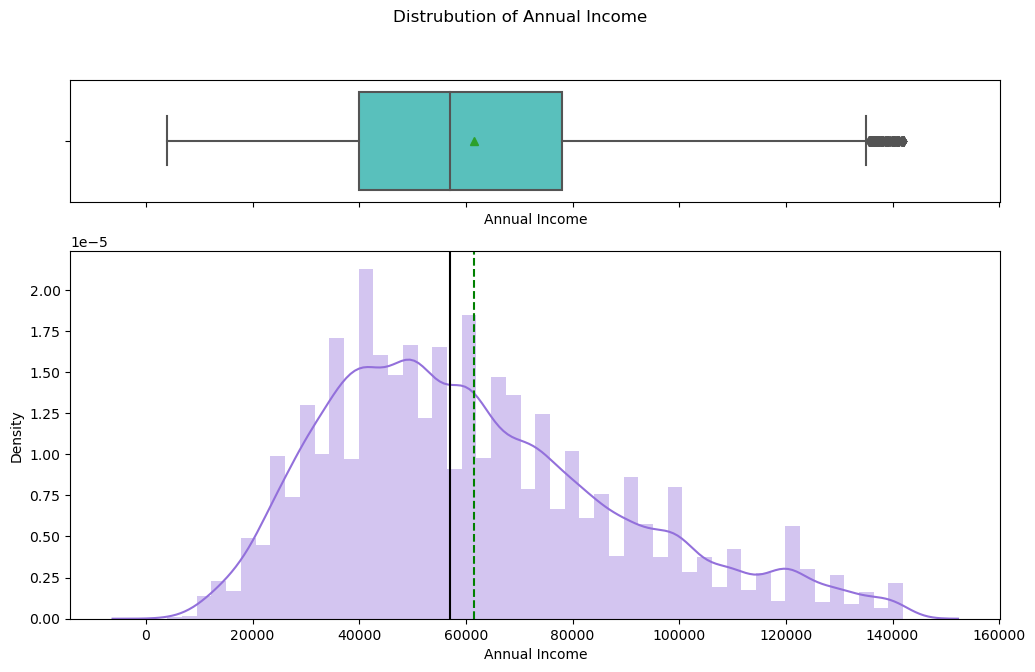

In [26]:
distribution_boxplot(masterLoanData,'annual_inc',"Distrubution of Annual Income",'Annual Income')
plt.show()

### Observation: Annual Income after dropping outliers
<li>Now the above plot gives better insights as compared to the earlier one, after dropping the data of outliers
<li>Annual income for most of the loan applicants ranges roughly between 39000 to 79000

### Plotting Distribution and Box plot for Interest Rate

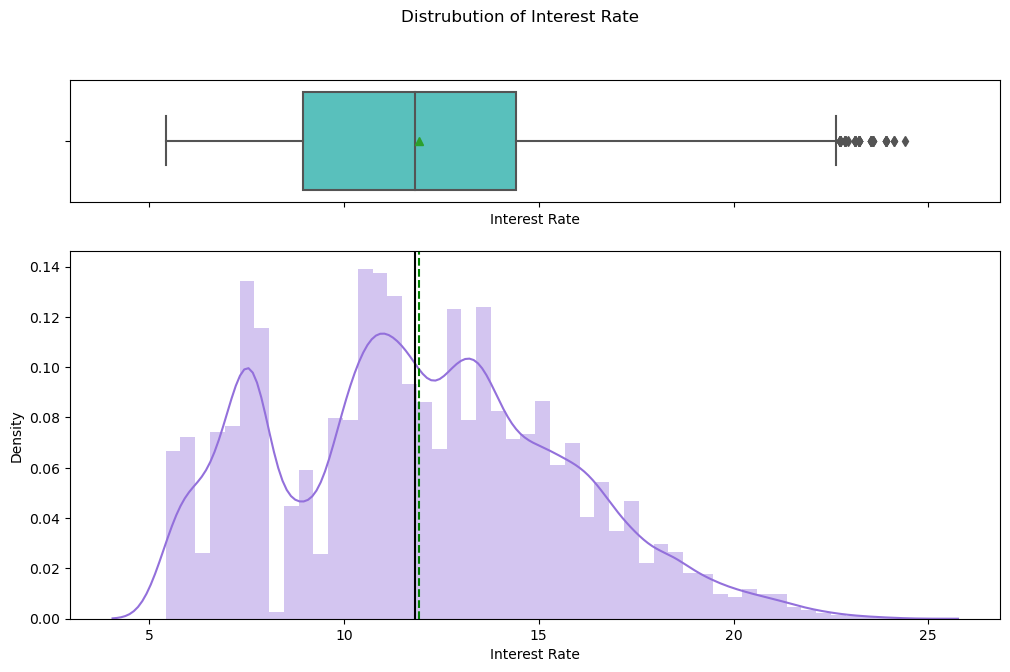

In [27]:
distribution_boxplot(masterLoanData,'int_rate',"Distrubution of Interest Rate",'Interest Rate')
plt.show()


### Observation: Interest Rate
<li>Majority of the loans are in the interest rate range 9-15%

### Plotting Distribution and Box plot for Loan Amount

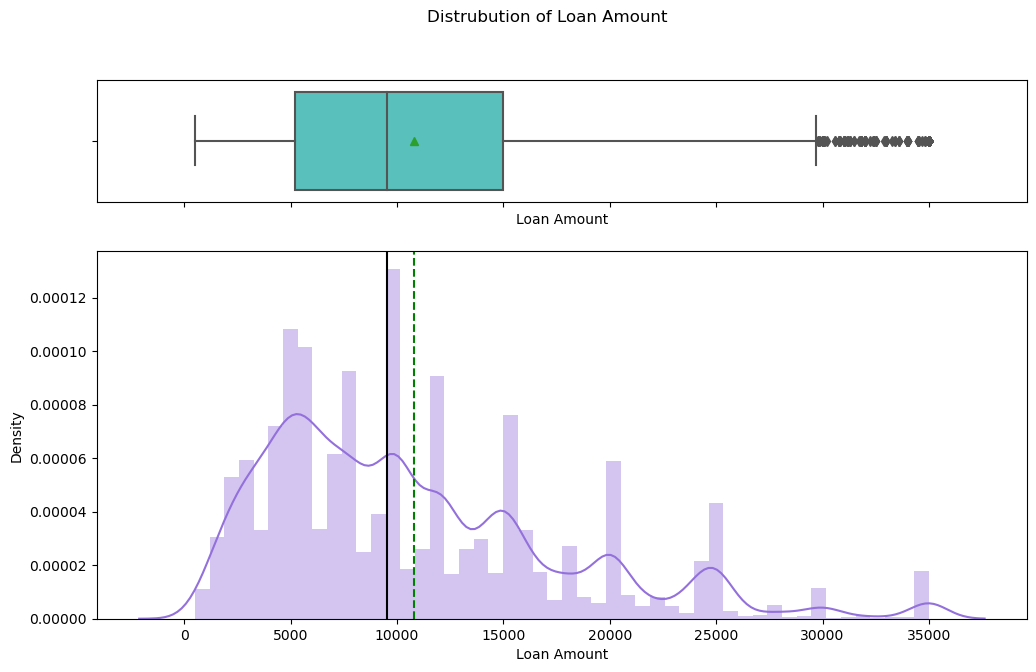

In [28]:
distribution_boxplot(masterLoanData,'loan_amnt',"Distrubution of Loan Amount",'Loan Amount')
plt.show()

### Observation:Loan Amount
<li>There are not many outliers having significantly huge values
<li>Most of the loans has loan amount which lies in the range of 5000 to 15000

### Plotting Distribution and Box plot for Funded Amount

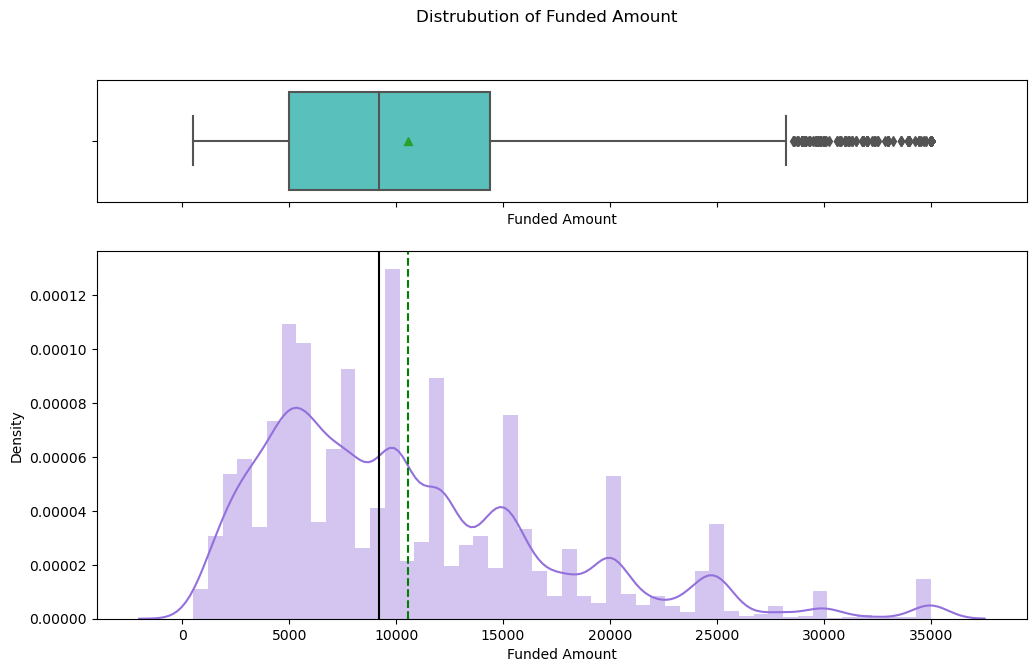

In [29]:
distribution_boxplot(masterLoanData,'funded_amnt',"Distrubution of Funded Amount",'Funded Amount')
plt.show()

### Observation: Funded Amount
<li>There are not many outliers having significantly huge values
<li>Most of the data is in the range 5000 to 15000 with respect to funded amount
<li>The data distribution is very much similar to loan amount
    

### Plotting Distribution and Box plot for Funded Amount Inv

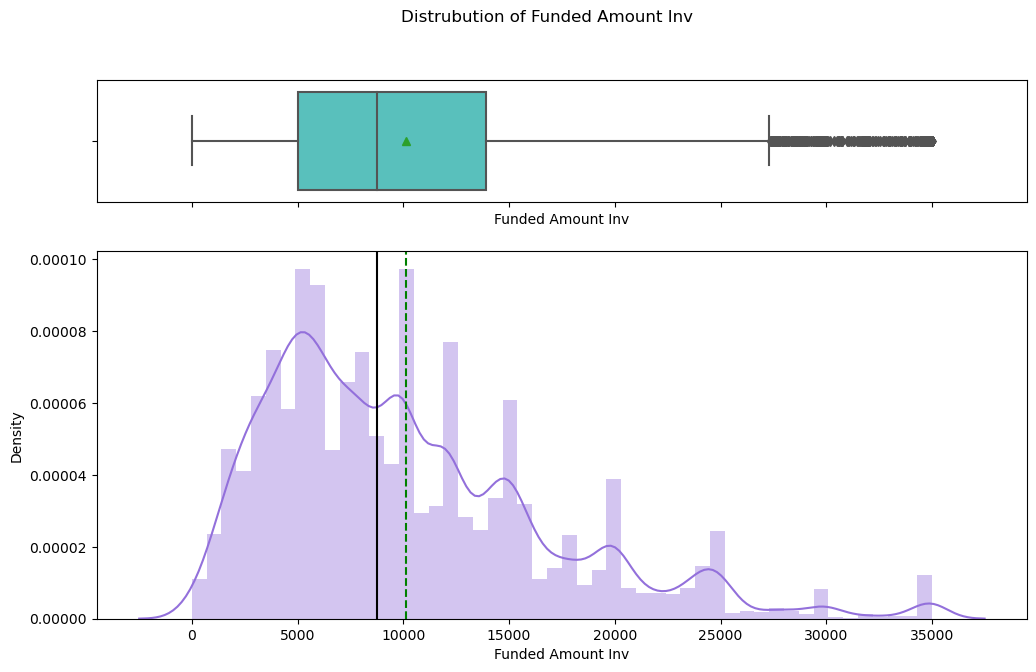

In [30]:
distribution_boxplot(masterLoanData,'funded_amnt_inv',"Distrubution of Funded Amount Inv",'Funded Amount Inv')
plt.show()

### Observation: Funded Amount Inv
<li>There are not many outliers having significantly huge values
<li>Most of the data is in the range 5000 to 15000 with respect to funded amount inv
<li>The data distribution is very much similar to loan amount and funded amount

### Plotting Distribution and Box plot for Debt to Income

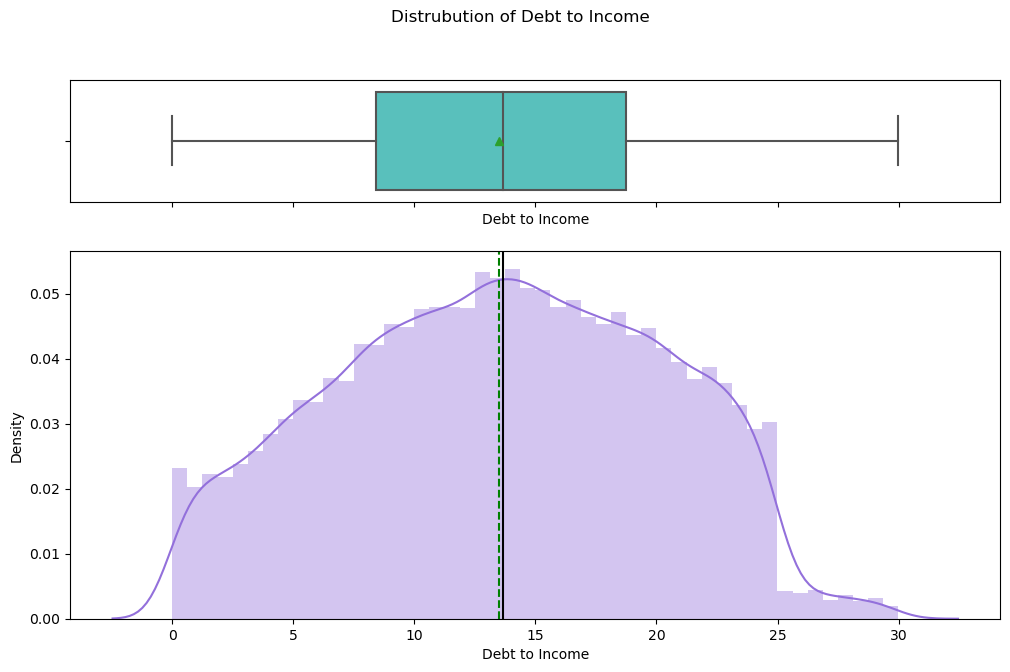

In [31]:
distribution_boxplot(masterLoanData,'dti',"Distrubution of Debt to Income",'Debt to Income')
plt.show()

### Observation: Debt to Income
<li>There are no outliers
<li>Majority of the dti lies in the range value of 8 to 19

# Segmented Univariate

In [32]:
#Function to add percentage to the count plot
def annotpercentage(ax):
    for p in ax.patches:
        #calculate percent of the count of each segment with the count of master data rows
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(masterLoanData))
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    return ax

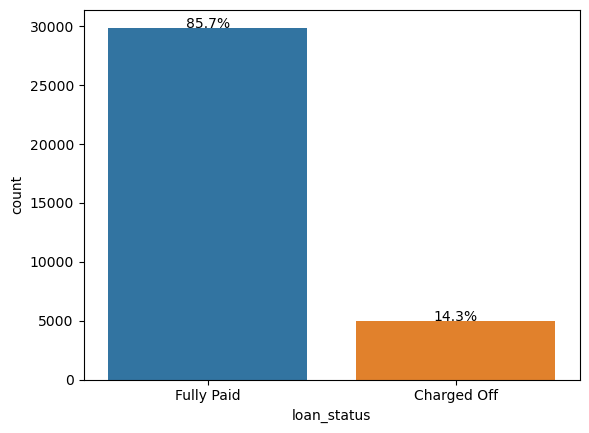

In [33]:
#Count plot of loan_status
ax_loanstatus=sns.countplot(x='loan_status', data=masterLoanData)
annotpercentage(ax_loanstatus)
plt.show()


### Observation: Loan Status
<li> Majority of the applicants are able to pay the loan amount fully    

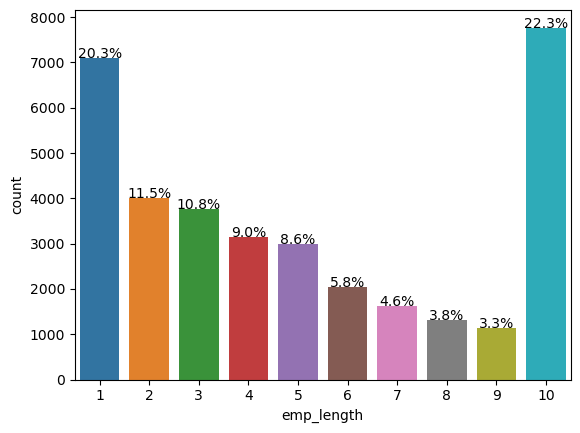

In [34]:
#count plot of employee length
ax_emp_len=sns.countplot(x='emp_length', data=masterLoanData)
annotpercentage(ax_emp_len)

plt.show()

### Observation: Employment Length
<li>Maximum loans are taken by the applicants who are employed for a tenure of 10+ years or 1 year

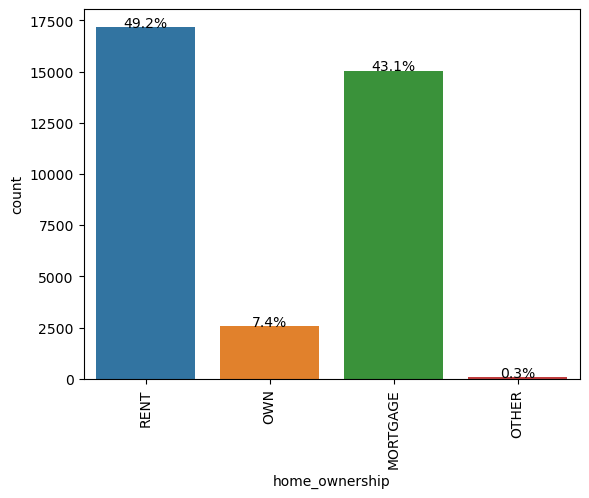

In [35]:
#Count plot for home ownership
ax_home=sns.countplot(x='home_ownership', data=masterLoanData)
annotpercentage(ax_home)
plt.xticks(rotation =90)    
plt.show()

### Observation: Home Ownership
<li>Most of the loan holders have rented house or has mortgage on their home

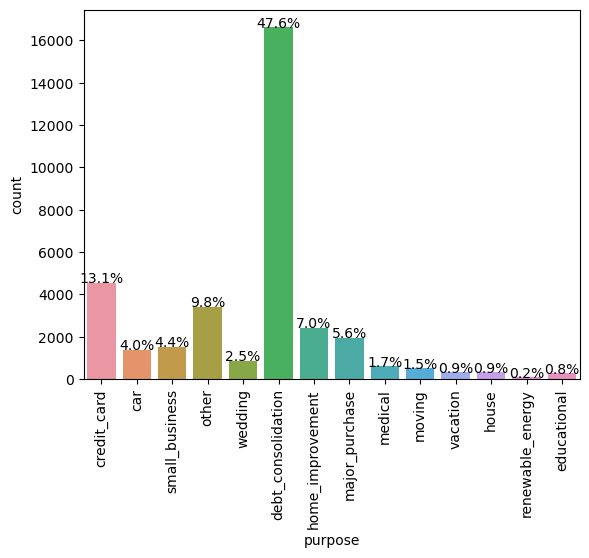

In [36]:
#Count plot for Purpose of loan
ax_purpose=sns.countplot(x='purpose', data=masterLoanData)
annotpercentage(ax_purpose)
plt.xticks(rotation =90)   
plt.show()

### Observation: Purpose of loan
<li>Maximum percentage of applicants has opted to take loans for debt consolidation

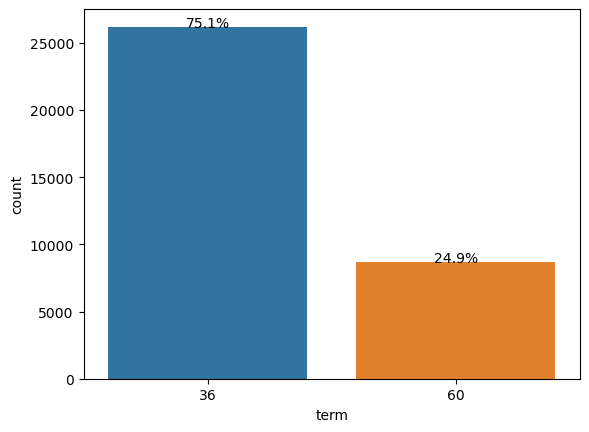

In [37]:
#count plot for term of loan
ax_term=sns.countplot(x='term', data=masterLoanData)
annotpercentage(ax_term) 
plt.show()

### Observation: Term of Loan
<li> There are only 2 terms(36 months and 60 months) for which the applicants has applied for the loan

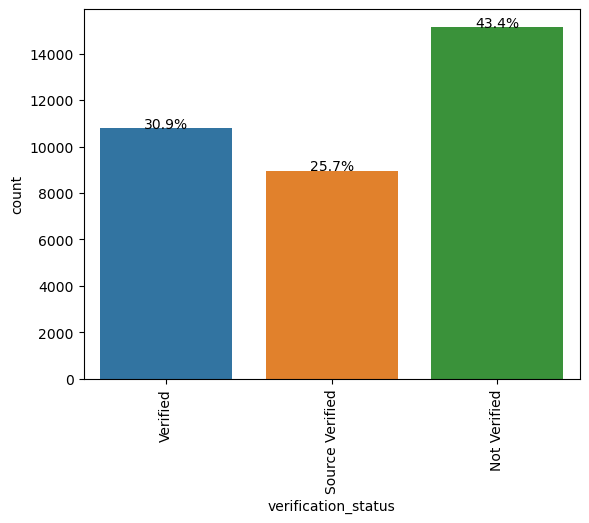

In [38]:
#count plot for verification status
ax_ver_status=sns.countplot(x='verification_status', data=masterLoanData)
annotpercentage(ax_ver_status)
plt.xticks(rotation =90)   
plt.show()

### Observation: Verification Status of Loan
<li> 42.2% are not verified by LC


# Bivariate Analysis

### Creating Heat Map to understand the corelation

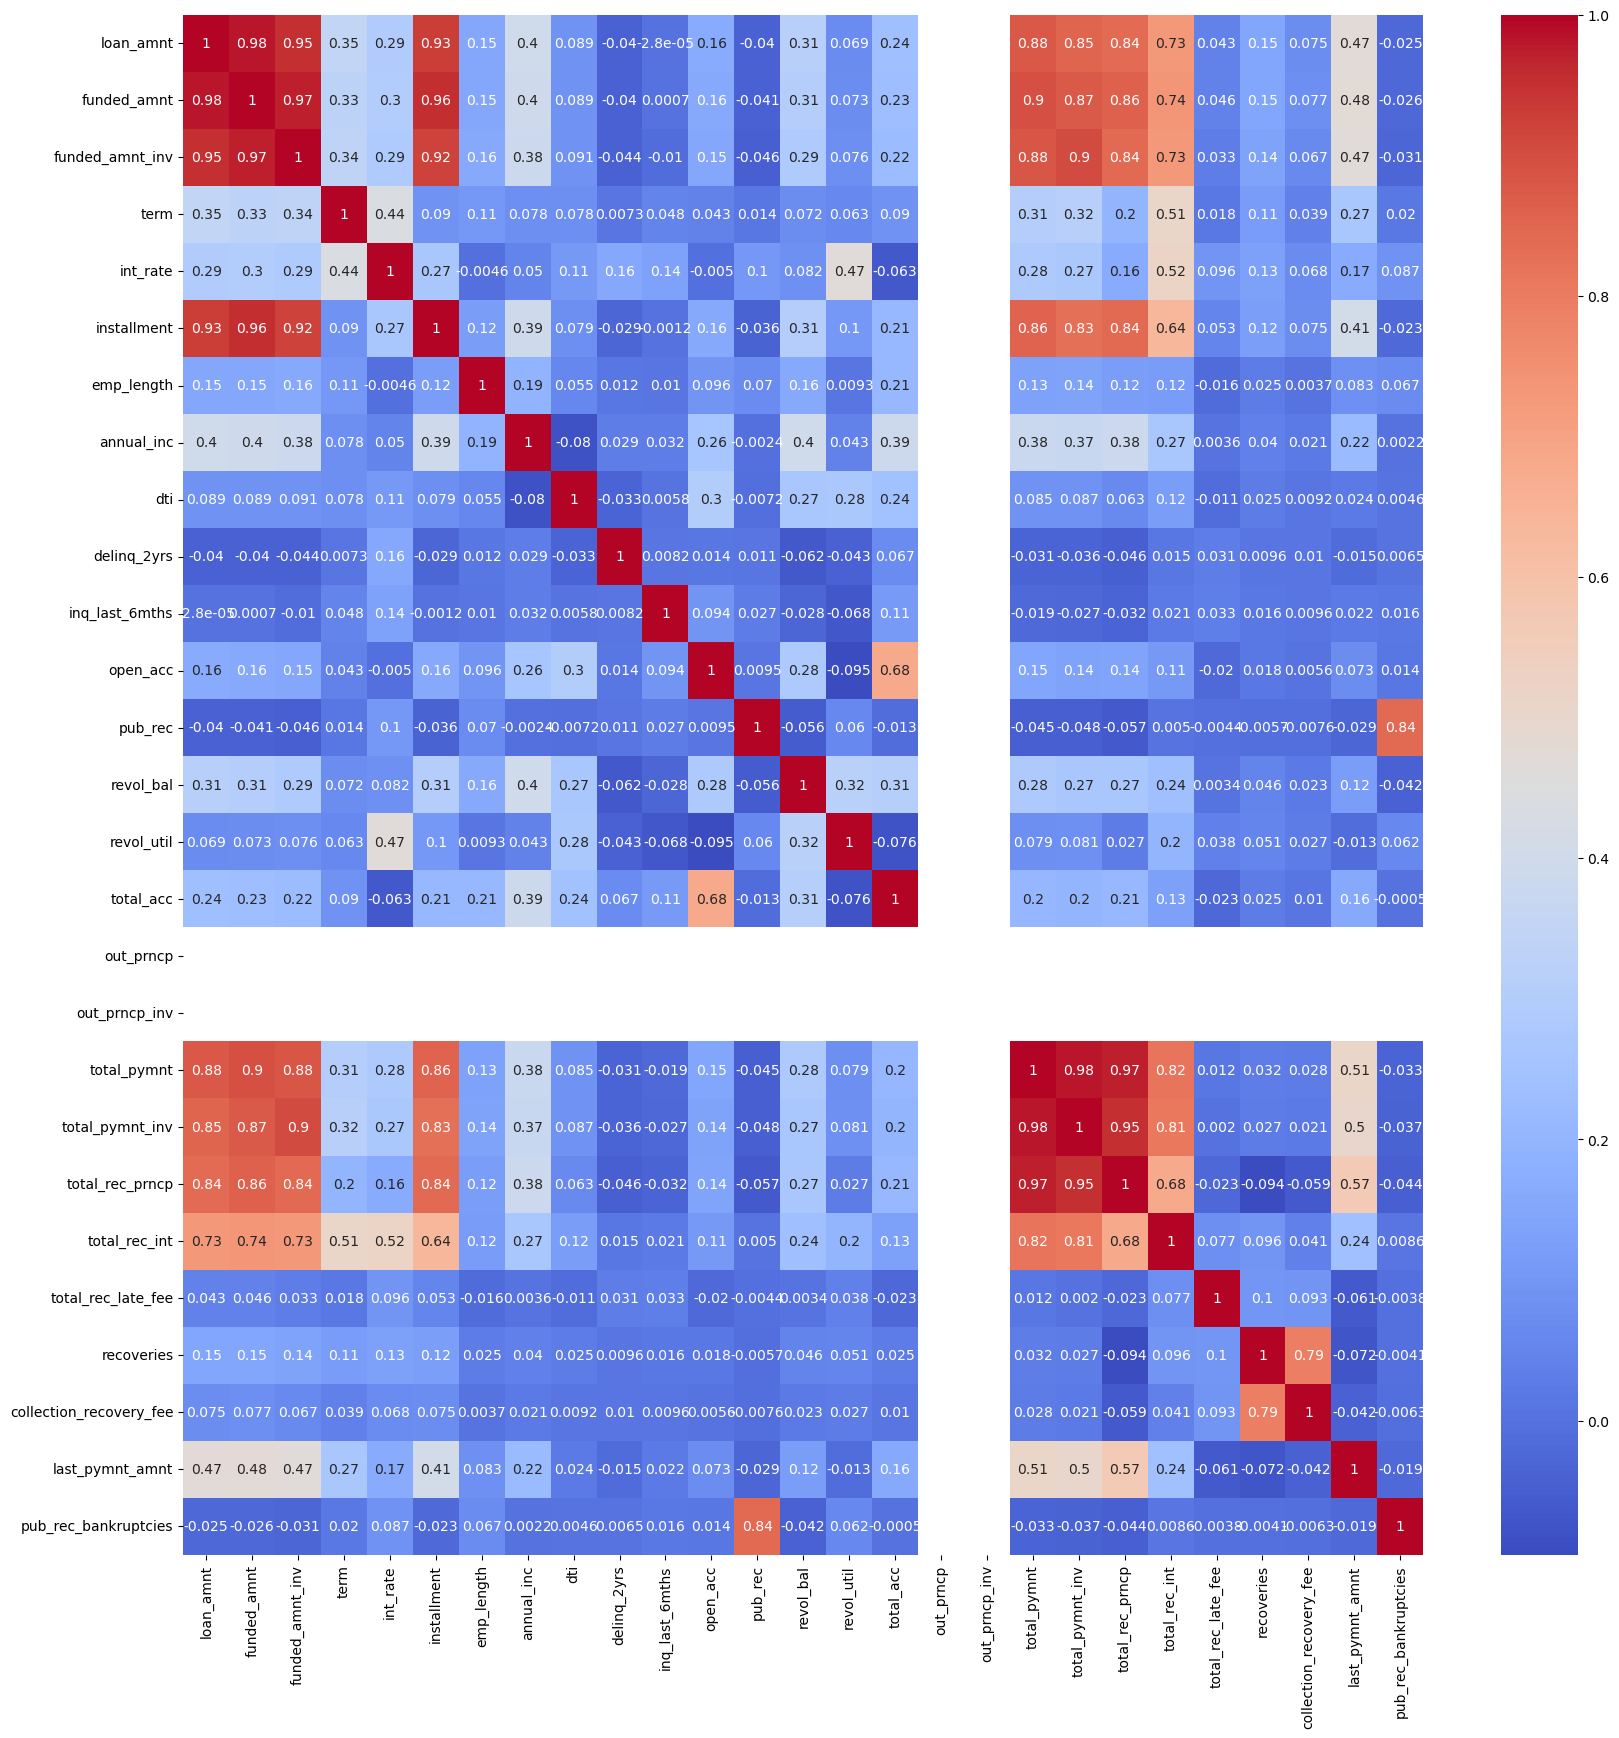

In [39]:
#Heatmap on continuous variables
plt.figure(figsize=(20,20))
sns.heatmap(masterLoanData[numeric_columns].corr(),annot=True, cmap ='coolwarm')
plt.show()

## Observation: 
'out_prncp','out_prncp_inv' has no correlation so the columns can be dropped

In [40]:
#Dropping out_prncp and out_prncp_inv as there is no corelation and both the variables have single value '0'
masterLoanData.drop(['out_prncp','out_prncp_inv'], axis=1, inplace=True)

In [41]:
#Updating numeric variable's list by removing 'out_prncp','out_prncp_inv'
numeric_columns.remove('out_prncp')
numeric_columns.remove('out_prncp_inv')

### Loan Status Vs Interest Rate

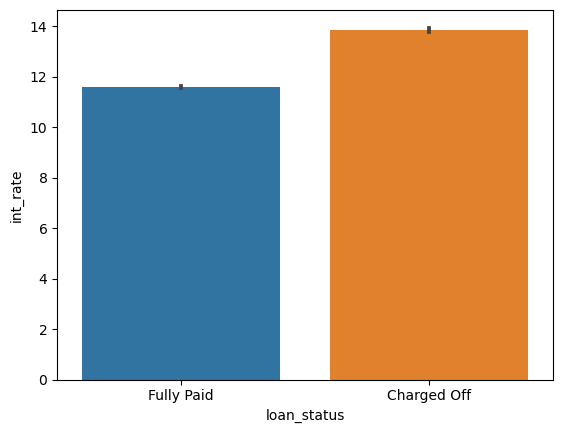

In [42]:
#Barplot for Loan status vs Interest rate
sns.barplot(x='loan_status', y='int_rate', data=masterLoanData)
plt.show()

### Observation:
<li> Average interest rate(mean) of Fully Paid loans is around ~11.6% and of Charged Off loan is ~12.6%
<li> Which implies there is a possibility that higher interest loans have more defaulters <br>   

### Loan Status Vs Annual Income

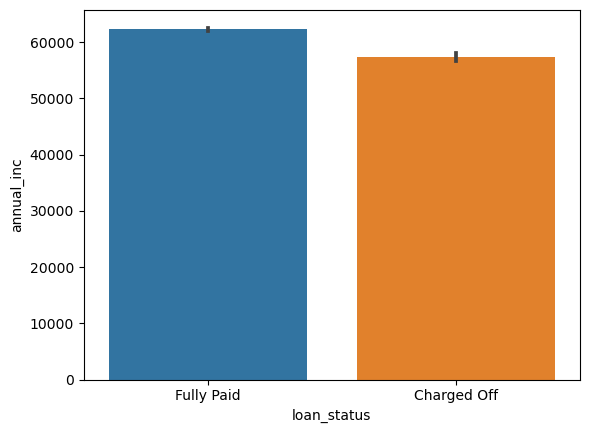

In [43]:
sns.barplot(x='loan_status', y='annual_inc', data=masterLoanData)
plt.show()

### Observation:
<li>Applicants having higher average annual income(above 58000) are able to pay the loan and there are no defaulters in that range

### Distribution of Loan Status over Interest Rate

In [44]:
#Creating a new columns based on binning of Intereset rate
masterLoanData['int_rate_bins'] = pd.cut(masterLoanData['int_rate'], bins=9,precision =0,labels=['5%-7%','7%-9%','9%-11%','11%-13%','13%-15%','15%-17%','17%-19%','20%-22%','22%-24%'])


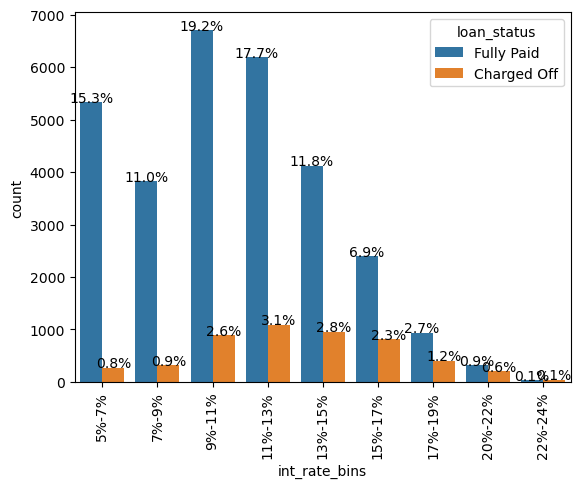

In [45]:
#Plotting the count plot for interest rate over loan status
ax_intrate_loanstatus=sns.countplot(x='int_rate_bins',data=masterLoanData,hue= 'loan_status')
annotpercentage(ax_intrate_loanstatus)
plt.xticks(rotation =90) 
plt.show()

### Observation of distribution of Loan Status over Interest Rate:
<li> Maximum defaulted loans are in the range of 11-13% followed by 13-15%
<li> Approximately equal percentage of loans were fully paid and defaulted at the higher range of interest rate i.e. 20-24%
<li> Very less applicants has defaulted at the lower rates 5-9%    

In [46]:
#Creating a function to plot the Charged off percent out of the total(of the unique category) loans taken
def newdf_plotchargeoffplot(columnname,df,x_label,y_label):
    #Creating a df with column and their chargeoff percent
    df_chargedOff= pd.DataFrame(columns=[columnname,'ChargeOff_Percent'])
    #For each state
    for x in df[columnname].unique():
        #calculating loans which are charged off for each column value
        chargeoff = len(df[((df['loan_status']=='Charged Off')&(df[columnname]== x))])
    
        #calculating percentage of defaulter: chargeoff rows of each unique column value divided by row counts of that column
        y = chargeoff/len(df[df[columnname] == x])*100
    
        #adding data to newly created df
        df_chargedOff=df_chargedOff.append({columnname:x,'ChargeOff_Percent':y},ignore_index= True)

    #plotting all the states and charge off percent on the graph
    plt_ax =sns.barplot(x=columnname,y= 'ChargeOff_Percent',data=df_chargedOff)
    plt_ax.set(xlabel=x_label, ylabel=y_label)
    plt.xticks(rotation =90)
    plt.gcf().set_size_inches(10,5)
    plt.show()

## Analysis Charge Off Loan Status vs State:

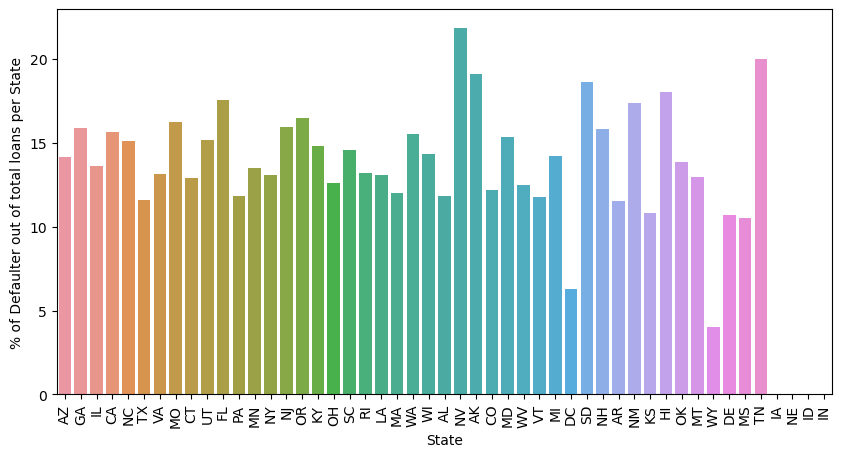

In [47]:
#Bar plot show the default percentage for each State based on teh total loans taken
newdf_plotchargeoffplot('addr_state', masterLoanData, 'State','% of Defaulter out of total loans per State')

### Observation Charge Off Loan Status vs State:

##### Note: Percentage default = Number of loans defaulted in a state divided by Total(defaulted + fully paid) number of loans taken in a State * 100 

<li>Percentage of defaulter against the total loan applications is higher in NV,TN,AK and SD
<li>Applicants from NV,TN,AK,SD states has a tendency to default more

## Analysis Charge Off Loan Status vs Grade:

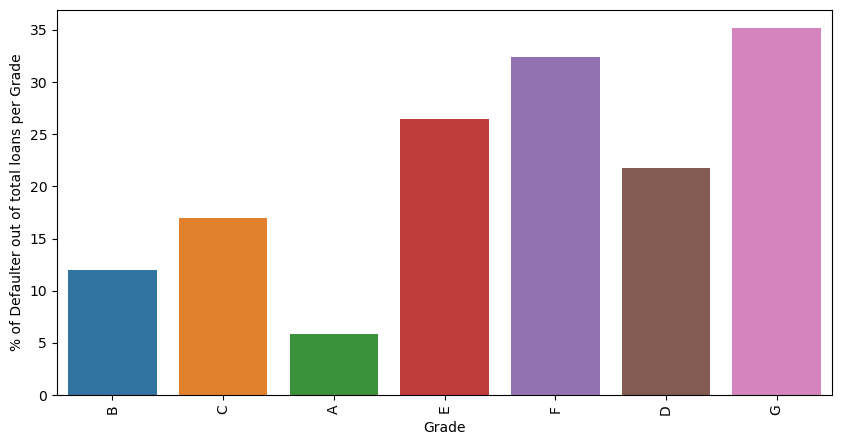

In [48]:
newdf_plotchargeoffplot('grade', masterLoanData, 'Grade','% of Defaulter out of total loans per Grade')

### Observation Charge Off Loan Status vs Grade:

##### Note: Percentage default = Number of loans defaulted for a grade divided by Total(defaulted + fully paid) number of loans given for a grade * 100 


<li>Percentage of defaulter against the total loan applications is higher for Grade G followed by F

## Analysis Charge Off Loan Status vs Verification Status:

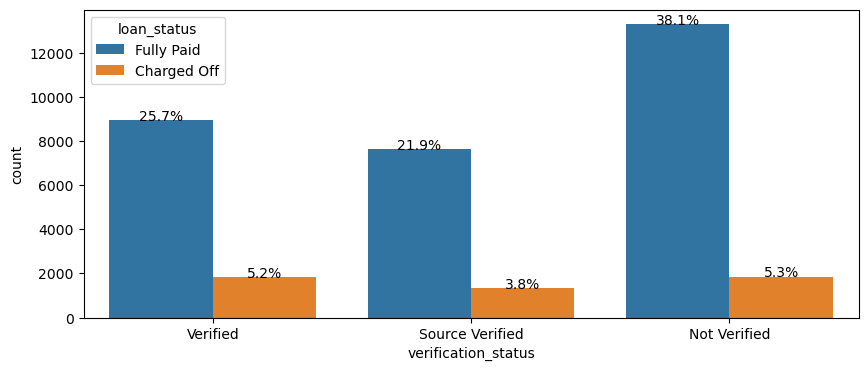

In [49]:
ax_verification_loanstatus=sns.countplot(x='verification_status',data=masterLoanData,hue= 'loan_status')
annotpercentage(ax_verification_loanstatus)
plt.gcf().set_size_inches(10,4)
plt.show()

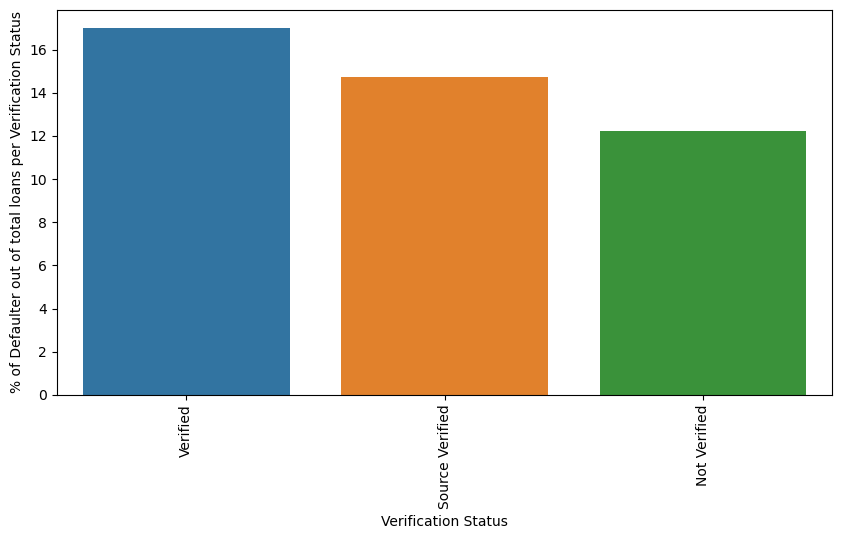

In [50]:
newdf_plotchargeoffplot('verification_status', masterLoanData,
                        'Verification Status','% of Defaulter out of total loans per Verification Status')

### Observation Charge Off Loan Status vs Verification Status:

##### Note: Percentage default = Number of loans defaulted for a Verification Status divided by Total(defaulted + fully paid) number of loans given  for a Ver status * 100 

<li> Verified loans has the most defaulted loans as per the ratio of defaulter per verification status
<li> When it comes to count of defaulter across all verification status's, then loans with 'Not Verified' status have slightly more defaulter, but there is not significant difference in defaulter count of 'Verified' and 'Not Verified'

## Analysis Charge Off Loan Status vs Interate rate:

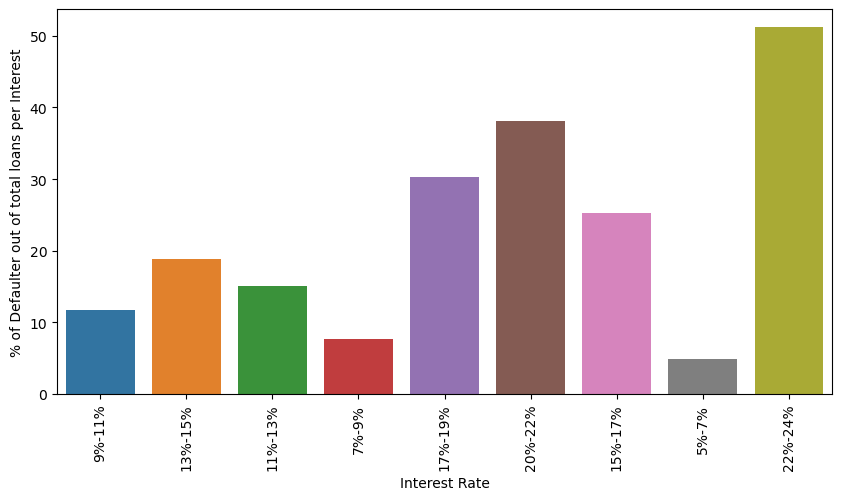

In [51]:
newdf_plotchargeoffplot('int_rate_bins', masterLoanData,
                        'Interest Rate','% of Defaulter out of total loans per Interest')

### Observation Charge Off Loan Status vs Interate Rate:

##### Note: Percentage default = Number of loans defaulted at an interest rate range divided by Total(defaulted + fully paid) number of loans given  at an interest range* 100 
<li> Loans with interest range 22%-24%, 20%-22% and 17%-19% have seen more defaulters

## Analysis Charge Off Loan Status vs Annual Income:

In [52]:
#Deriving new column for binning the Annual Income Variable
masterLoanData['annual_inc_bins'] = pd.cut(masterLoanData['annual_inc'], bins=20,precision =0)


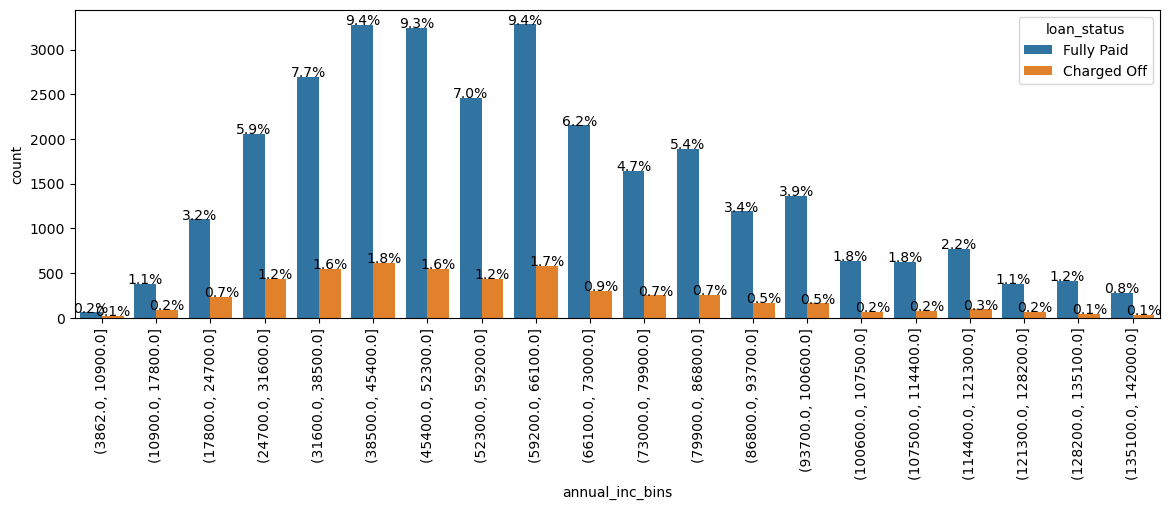

In [53]:
#Access the distribution of interest rate over loan status
ax_inc_loanstatus=sns.countplot(x='annual_inc_bins',data=masterLoanData,hue= 'loan_status')
annotpercentage(ax_inc_loanstatus)
plt.xticks(rotation =90)
plt.gcf().set_size_inches(14,4)
plt.show()

### Observation Distribution of Loan Status over Annual Income:
<li>The spread of loan is dense in the range of 24700-86800.
<li>The above statement holds true for defaulters as well,as majority of defaulters can also be seen in that income range


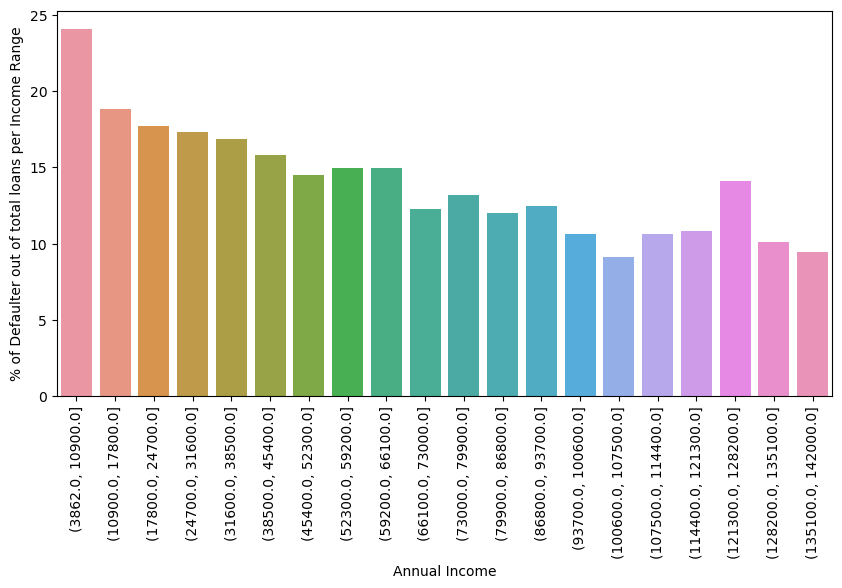

In [54]:
newdf_plotchargeoffplot('annual_inc_bins', masterLoanData.sort_values('annual_inc_bins'),
                        'Annual Income','% of Defaulter out of total loans per Income Range')

### Observation Charge Off Loan Status vs Annual Income:

##### Note: Percentage default = Number of loans defaulted for an Income range divided by Total(defaulted + fully paid) number of loans given  for an income range* 100 <br>

<li> While observing the ratio of defaulters vs total loans, applicants having lower annual income are more likely to default

In [55]:
#Deriving new column for binning the Funded Amount INV Variable
masterLoanData['funded_inv_bins'] = pd.cut(masterLoanData['funded_amnt_inv'], bins=10,precision =0)

## Analysis Charge Off Loan Status vs Funded Amount Inv:

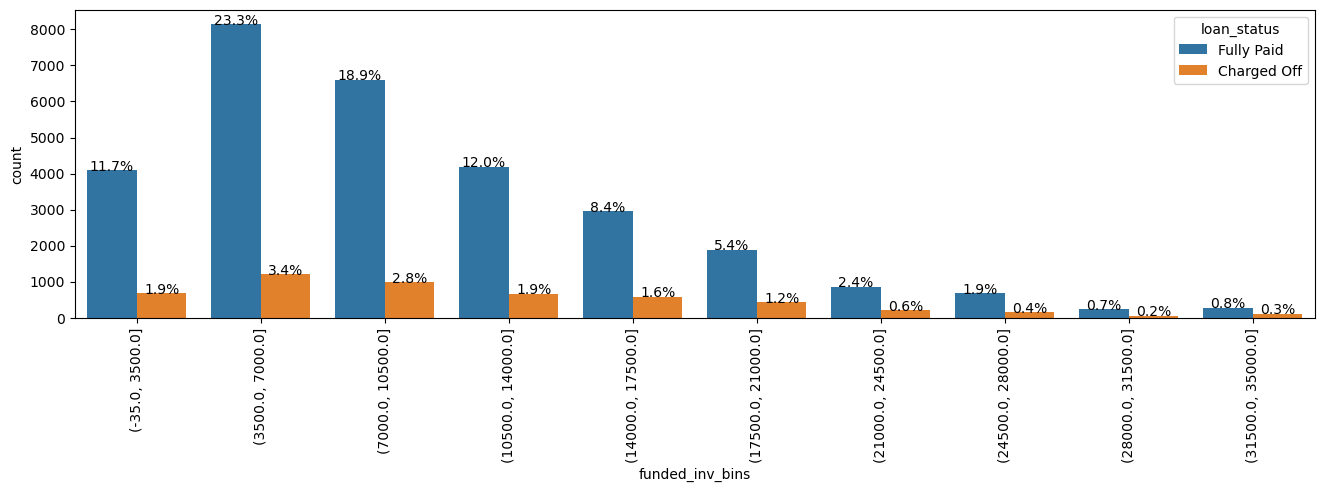

In [56]:
#Access the distribution of Funded Amount Inv over loan status
ax_inc_loanstatus=sns.countplot(x='funded_inv_bins',data=masterLoanData,hue= 'loan_status')
annotpercentage(ax_inc_loanstatus)
plt.xticks(rotation =90)
plt.gcf().set_size_inches(16,4)
plt.show()

### Observation Charge Off Loan Status vs Funded Amount Inv:
<li> Majority of Loans are having Funded Amount Inv in the range 3500- 10500
<li> Defaulters also has the same trend in this range

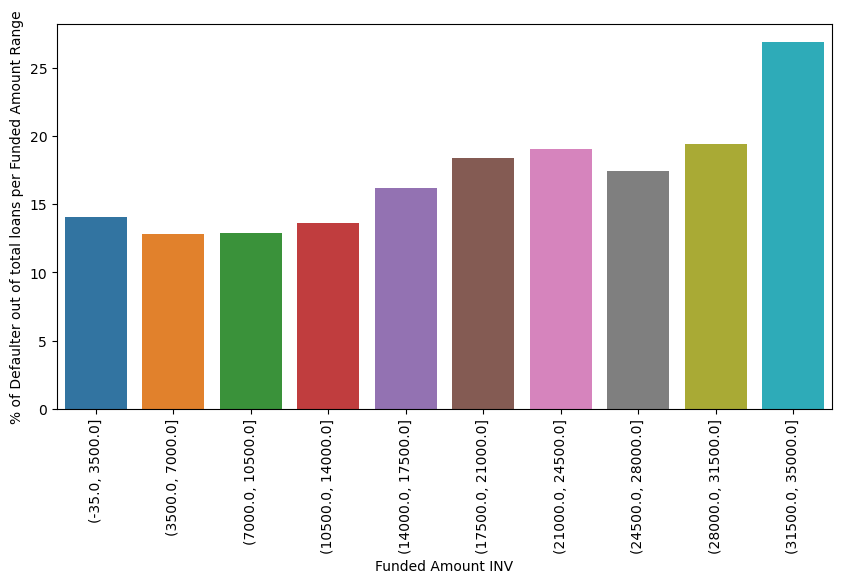

In [57]:
newdf_plotchargeoffplot('funded_inv_bins', masterLoanData.sort_values('funded_inv_bins'),
                        'Funded Amount INV','% of Defaulter out of total loans per Funded Amount Range')

### Observation for Percentage Charge Off Loan Status vs Funded Amount Inv:
##### Note: Percentage default = Number of loans defaulted for an amount inv range divided by Total(defaulted + fully paid) number of loans given  for that amount inv range* 100
<li> Applicants having 'Funded Amount Inv' in the range 31500-35000 have more tendency to default

# Interest Rate Vs Grade in box plot

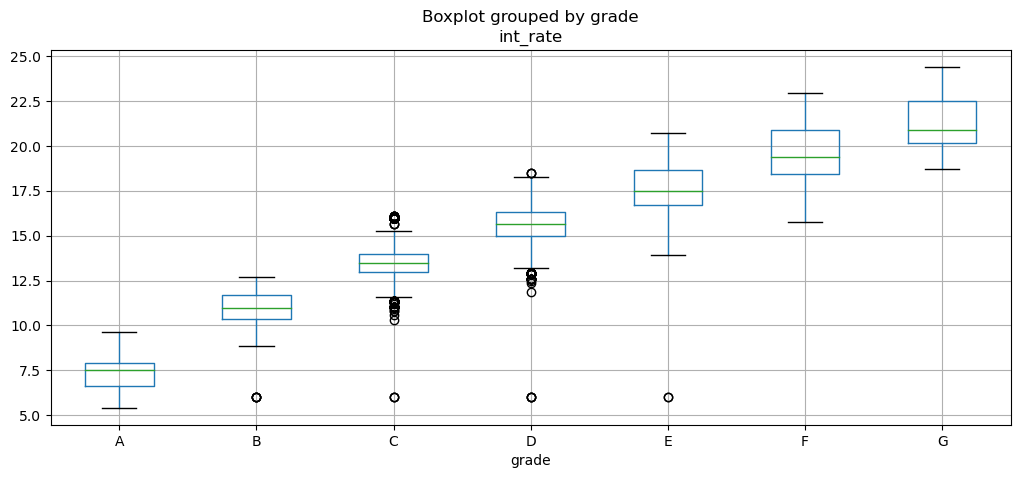

In [58]:
masterLoanData.boxplot(column='int_rate', by='grade',figsize=(12,5))
plt.show()

### Observation Interest Rate Vs Grade:
<li> There is an evident trend of increasing interest rate as the Grade decreases, excluding few outliers

# Interest Rate Vs Sub Grade in box plot

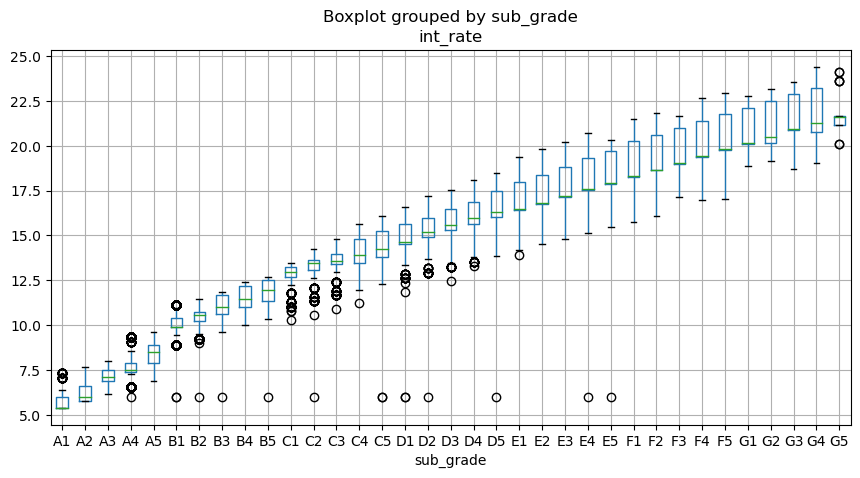

In [59]:
masterLoanData.boxplot(column='int_rate', by='sub_grade',figsize=(10,5))
plt.show()

### Observation Interest Rate Vs Sub Grade:
<li> Similar to Grade, there is an evident trend of increasing interest rate as the Sub Grade decreases, excuding few outliers

# Derived Metrix

#### Converting issue date column type

In [60]:
#converting issue date to date type
masterLoanData['issue_d'] = pd.to_datetime(masterLoanData.issue_d, format='%b-%y')
masterLoanData['issue_d'].value_counts()

2011-12-01    1919
2011-11-01    1868
2011-10-01    1730
2011-09-01    1709
2011-08-01    1654
2011-07-01    1580
2011-06-01    1565
2011-05-01    1473
2011-04-01    1440
2011-03-01    1320
2011-01-01    1279
2011-02-01    1183
2010-12-01    1163
2010-07-01    1053
2010-11-01    1051
2010-10-01    1025
2010-08-01    1008
2010-09-01    1001
2010-06-01     949
2010-05-01     858
2010-04-01     770
2010-03-01     677
2010-02-01     567
2009-11-01     565
2009-12-01     551
2010-01-01     547
2009-10-01     512
2009-09-01     424
2009-08-01     390
2009-07-01     353
2009-06-01     335
2009-05-01     305
2009-04-01     277
2009-03-01     267
2009-02-01     250
2009-01-01     225
2008-12-01     206
2008-11-01     179
2008-04-01     146
2008-03-01     110
2008-10-01      89
2008-07-01      80
2008-05-01      67
2008-08-01      65
2008-06-01      65
2008-09-01      29
2008-02-01       7
2008-01-01       6
2007-12-01       2
2007-11-01       2
2007-08-01       2
2007-10-01       1
Name: issue_

#### Creating Month and Date column for issue date

In [61]:
masterLoanData['issue_month'] = masterLoanData['issue_d'].dt.month
masterLoanData['issue_year'] =  masterLoanData['issue_d'].dt.year
print(masterLoanData['issue_month'].value_counts())
masterLoanData['issue_year'].value_counts()

12    3841
11    3665
10    3357
9     3163
8     3119
7     3066
6     2914
5     2703
4     2633
3     2374
1     2057
2     2007
Name: issue_month, dtype: int64


2011    18720
2010    10669
2009     4454
2008     1049
2007        7
Name: issue_year, dtype: int64

# Analyzing count of loans per issued year

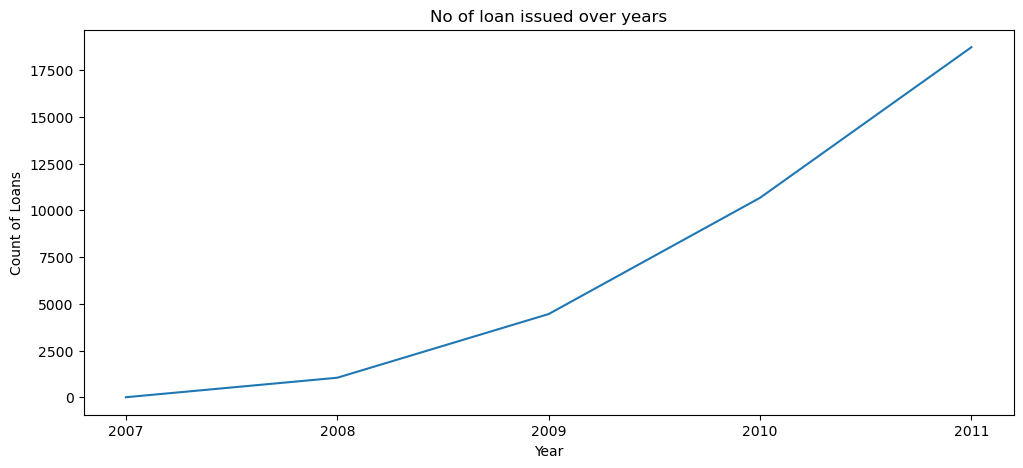

In [62]:
plt.figure(figsize=(12,5))
loan_groupby_year=masterLoanData.groupby('issue_year').loan_status.count()
loan_groupby_year.plot(kind='line', ylabel='Count of Loans')
plt.xticks(np.arange(min(loan_groupby_year.index), max(loan_groupby_year.index)+1, 1))
plt.title('No of loan issued over years')
plt.xlabel('Year')
plt.show()

### Observation count of loans per issued year:
<li> Count of loans have increased over the years

# Analysing count of loans per issued month

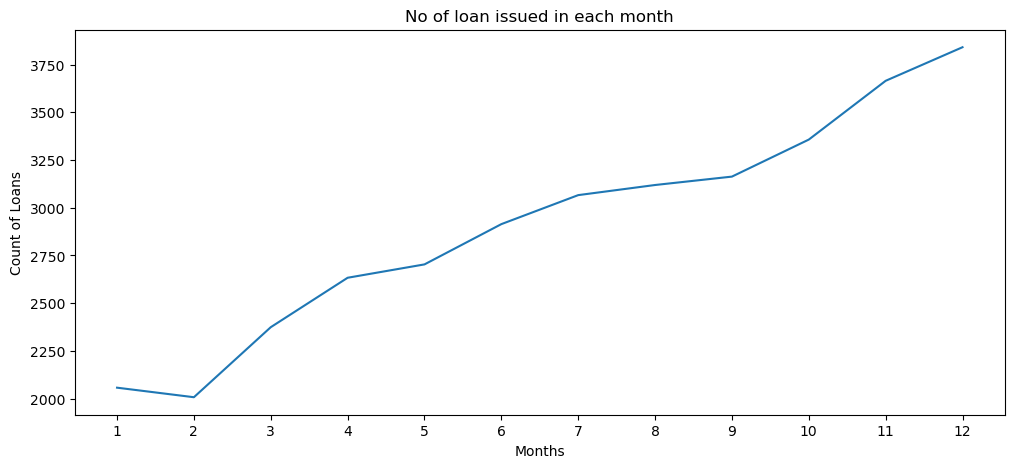

In [63]:
plt.figure(figsize=(12,5))
loan_groupby_month=masterLoanData.groupby('issue_month').loan_status.count()
loan_groupby_month.plot(kind='line', ylabel='Count of Loans')
plt.xticks(np.arange(min(loan_groupby_month.index), max(loan_groupby_month.index)+1, 1))
plt.title('No of loan issued in each month')
plt.xlabel('Months')
plt.show()

### Observation count of loans per issued month:
<li> Count of loans issued in increasing from January to December, with a slight dip in February.
<li> Most numberr of Loans are issued in the month of December

## Analysis of percentage of Charge Off Loan Status vs Issued Year:

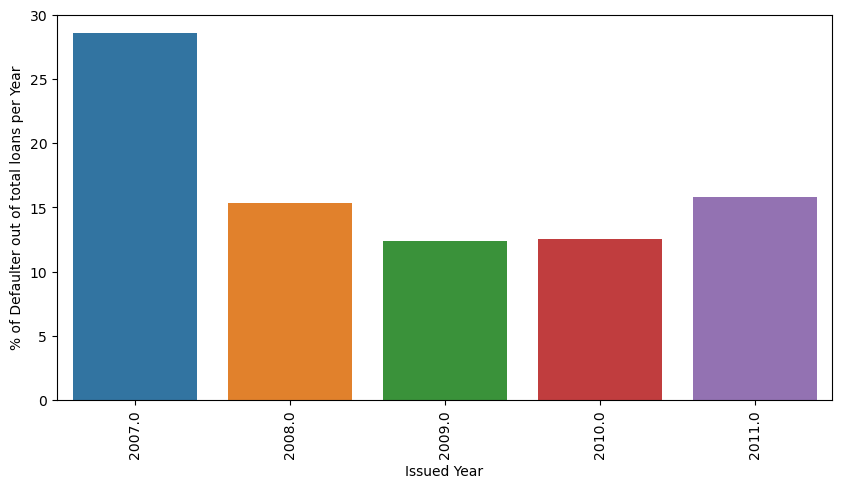

In [64]:
newdf_plotchargeoffplot('issue_year', masterLoanData,
                        'Issued Year','% of Defaulter out of total loans per Year')

### Observation percentage of Charge Off Loan Status vs Issued Year:
<li> There have been more number of defaults for loans issued in year 2007, as per the ratio of defaulters against total loans issued per year
<li> Which could be because of the financial crisis that was observed later in 2008 

## Analysis of percentage of Charge Off Loan Status vs Issued Month:

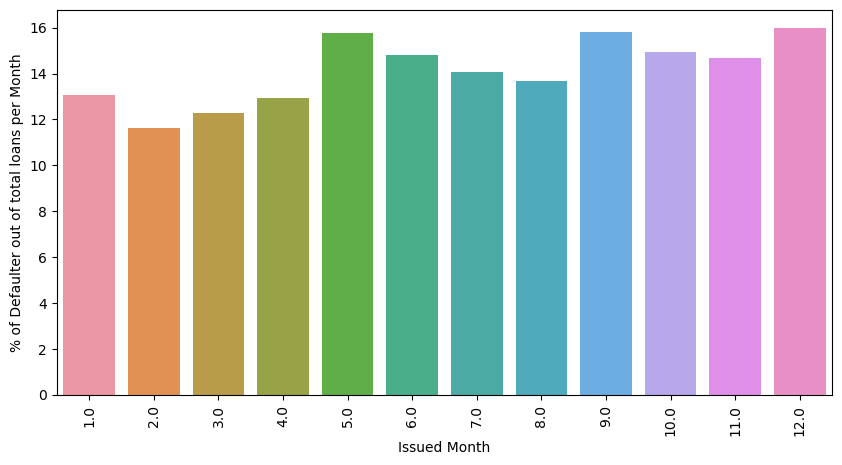

In [65]:
newdf_plotchargeoffplot('issue_month', masterLoanData,
                        'Issued Month','% of Defaulter out of total loans per Month')

### Observation percentage of Charge Off Loan Status vs Issued Month:
<li> There is no significant difference in ratio of defaulter against total loan issued in each month
<li> There have been slightly more ratio of defaulters for loans issued in months of May, September and December

# Recommendations:

### Interest Rate : Loans given at a higher interest rates are defaulted by the applicants frequency. Lending club should restrict the loans to lower rate of interest to avoid loss <br>
### Funded Amount Inv: Loans with higher funded amount inv i.e. >31500 has a trend to be defaulted by the applicants. Lending club should avoid funding such high value 
### Grade: Avoid approving loans with lower Grades F, G
### Purpose: The loan taken for debt consolidation has higher defaulter. Such loans should be evaluated thoroughly and granted with lower value loans
### Annual Income: Applicants with low annual income tend to default more. Lending club should keep threshold on loan values based on the annual income of the applicants
### Home Ownership: Applicants who has rented homes or have mortgages are also more likely to default. Lending club should expedite the loan requests after thoroughly verifying the annual income, credit scores, existing loans etc. 
